# Project 3 - DSC 440 Data Science Practicum 

# Sara Davila 

# House Prices - Advanced Regression Techniques

# Kaggle competitions 



## Overview
This project, focuses on the "House Prices - Advanced Regression Techniques" Kaggle competition. The primary objective is to develop predictive models for house prices utilizing advanced regression techniques. The dataset for this competition is sourced from Kaggle.

## Competition Details
- **Competition Name**: House Prices - Advanced Regression Techniques
- **Platform**: Kaggle Competitions
- **Data Source**: [House Prices Competition Data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

## Objectives
- Extract and explore the provided dataset.
- Develop predictive models using advanced regression techniques.
- Optimize model performance to accurately predict house prices.

## Methodology
1. **Data Extraction and Exploration**:
    - Download the dataset from the provided Kaggle competition page.
    - Explore the dataset to understand its structure, features, and target variable.
2. **Data Preprocessing**:
    - Handle missing values, outliers, and categorical variables.
    - Perform feature engineering if necessary to enhance model performance.
3. **Model Development**:
    - Implement advanced regression techniques such as Ridge Regression and Random Forest Regressor.
    - Train the models on the preprocessed dataset.
4. **Model Evaluation**:
    - Evaluate the performance of developed models using appropriate metrics.
5. **Model Optimization**:
    - Fine-tune hyperparameters and conduct feature selection to optimize model performance.
6. **Final Model Selection**:
    - Select the best-performing model based on evaluation results.
7. **Documentation**:
    - Document the entire process, including data exploration, preprocessing steps, model development, evaluation metrics, and final model selection.



## Loading the Data (train and test)

### Print columns 

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

train_data_dir = '/Users/saradavila/Downloads/house-prices-advanced-regression-techniques/train.csv'
test_data_dir = '/Users/saradavila/Downloads/house-prices-advanced-regression-techniques/test.csv'


# Load the data into dataframes
train_df = pd.read_csv(train_data_dir)
test_df = pd.read_csv(test_data_dir)

# Print columns of train and test dataframes
print("Columns in train data:")
print(train_df.columns)

print("\nColumns in test data:")
print(test_df.columns)



Columns in train data:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'G

# Classifying categorical and numerical variables

In [4]:
# Identify categorical and numerical variables in train data
categorical_train = train_df.select_dtypes(include=['object', 'category']).columns
numerical_train = train_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical variables in train data:")
print(categorical_train)

print("\nNumerical variables in train data:")
print(numerical_train)



Categorical variables in train data:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numerical variables in train data:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBat

# Visualization of Missing Values

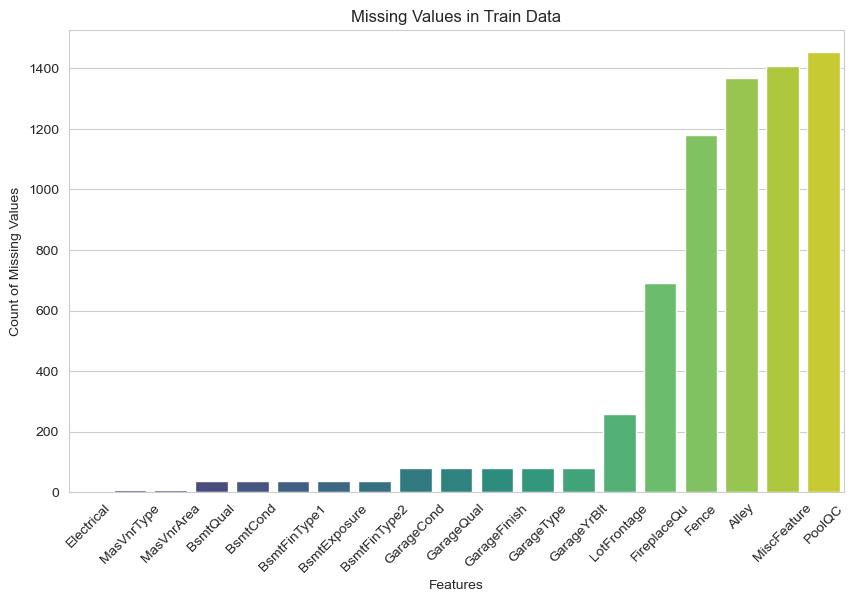

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Calculate missing values for train data
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_train.index, y=missing_train.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Missing Values in Train Data')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.show()


* In this bar graph it is possible to identify the variables with more missing values 

# Data Visualization based on the Sale Price

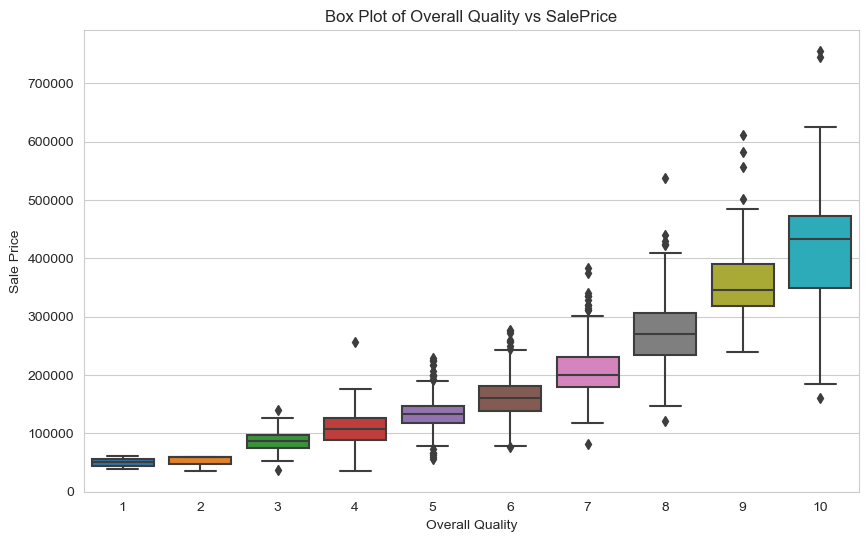

In [75]:
import seaborn as sns

# Visualization 1: Box Plot for OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Box Plot of Overall Quality vs SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()



* This graph shows that the houses with higher overall quality has an average price higher between 400K and 500K 

* There is also a great quantity of outliers of the numbers 5, 6, 7 ( overall quiality)



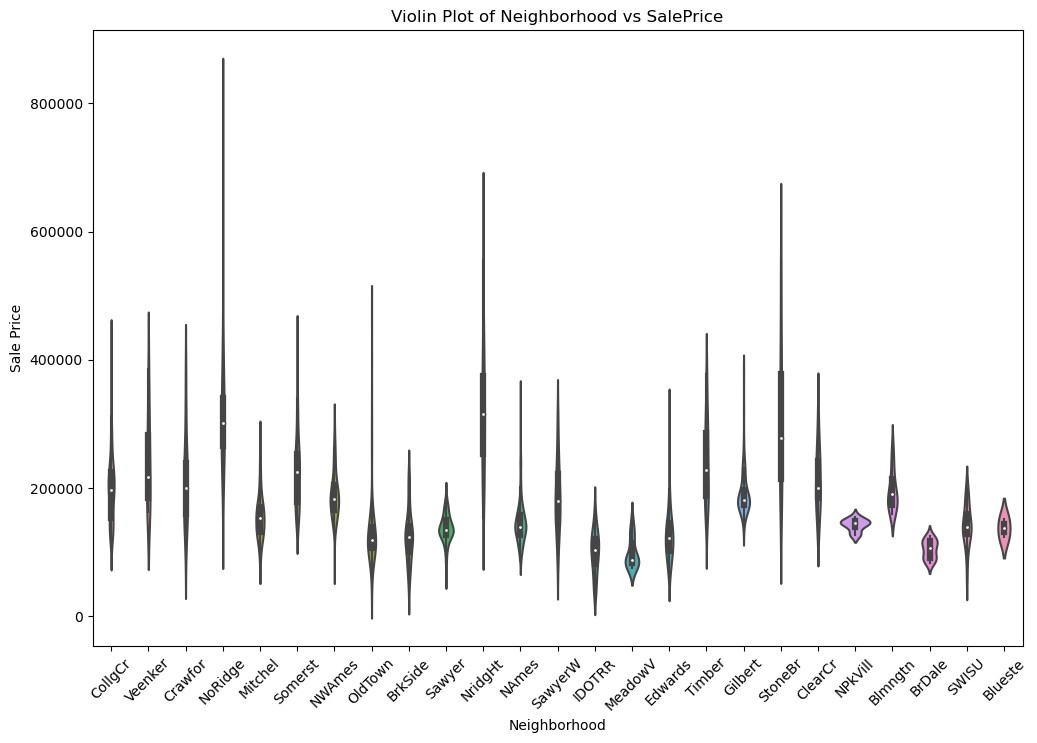

In [17]:
# Visualization 2: Violin Plot for Neighborhood vs SalePrice
plt.figure(figsize=(12, 8))
sns.violinplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.title('Violin Plot of Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()



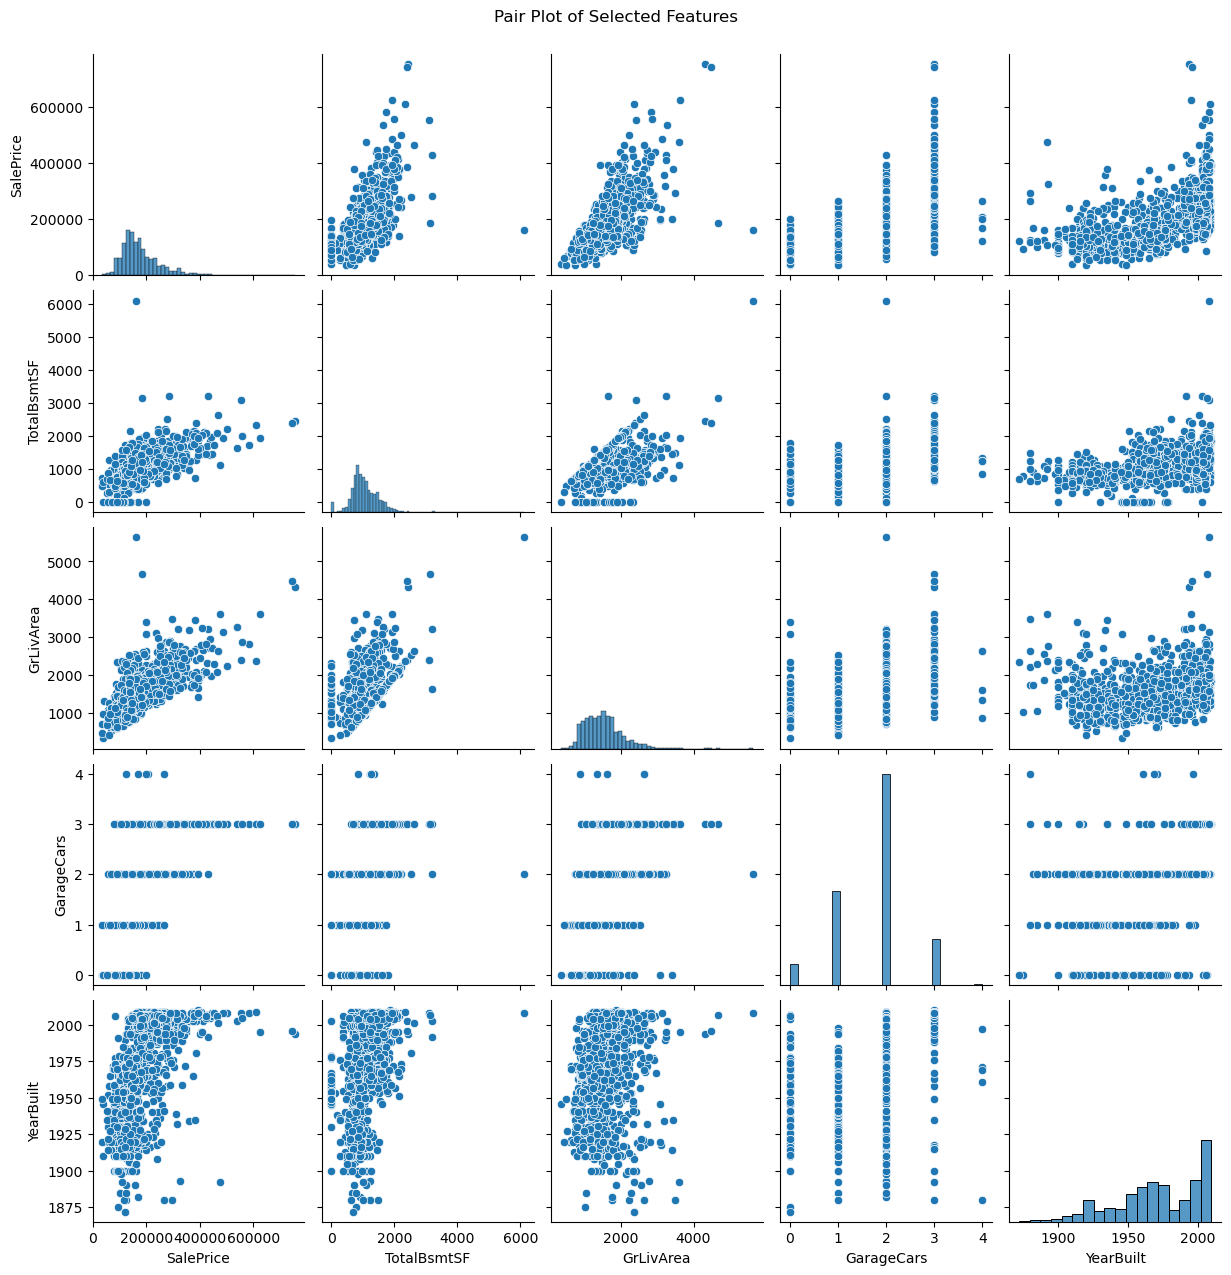

In [18]:
# Visualization 3: Pair Plot for Selected Features

selected_features = ['SalePrice', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'YearBuilt']
sns.pairplot(train_df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()



/var/folders/qn/sh2jd79d6wb_xwd4jjhlngcr0000gn/T/ipykernel_54402/4059227640.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MoSold', y='SalePrice', data=train_df, ci=None)


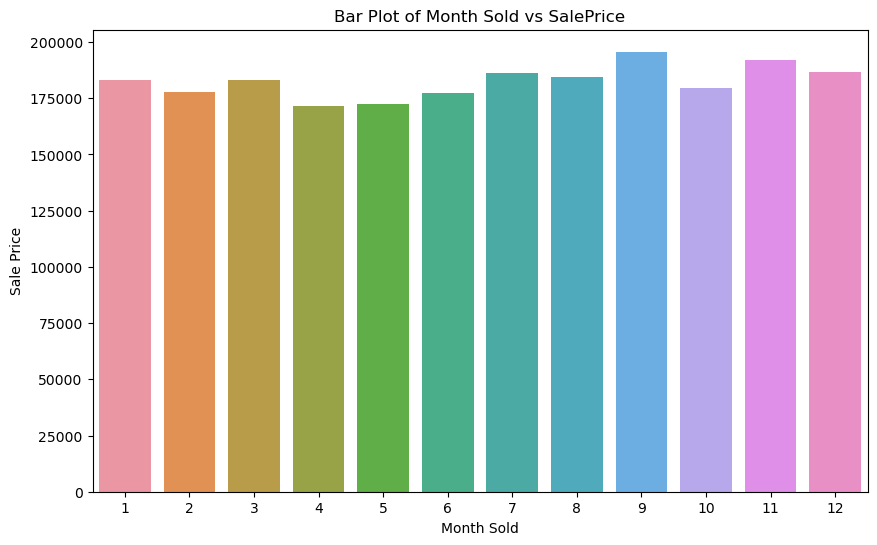

In [19]:
# Visualization 4: Bar Plot for Month Sold vs SalePrice

plt.figure(figsize=(10, 6))
sns.barplot(x='MoSold', y='SalePrice', data=train_df, ci=None)
plt.title('Bar Plot of Month Sold vs SalePrice')
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.show()



* This graph shows the months in which houses are sold the most. 
* October and november 

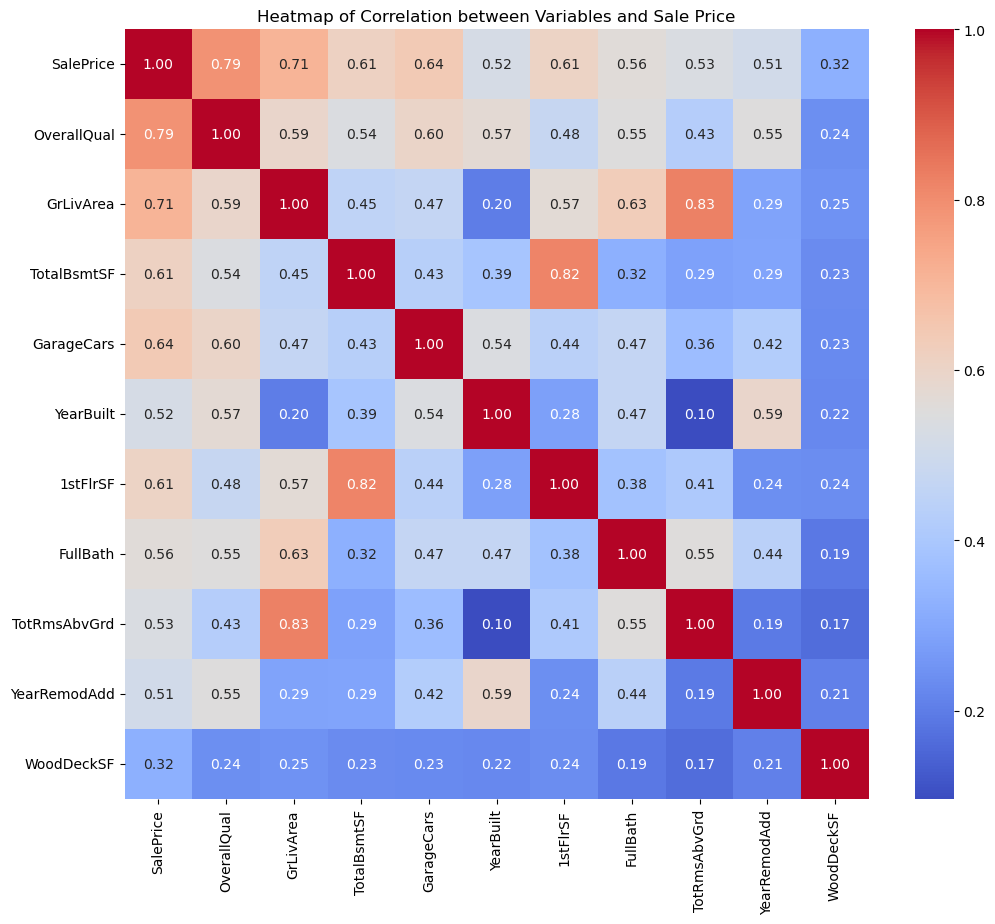

In [24]:
# Selecting a subset of variables to analyze
selected_variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt',
                      '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd', 'WoodDeckSF']

# Creating a correlation matrix based on the selected variables
correlation_matrix_subset = train_df[selected_variables].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Variables and Sale Price')
plt.show()



* This heatmap shows the correlation of the most important variables based on the sale price of houses 

# Cleaning the Data 

# Data Preparation for Modeling

## Identifying Categorical and Numerical Variables


#### Description:
- `categorical_train`: Contains the names of categorical variables in the training data.
- `numerical_train`: Contains the names of numerical variables in the training data.

## Handling Missing Values


#### Description:
- `percent_missing(df)`: Function to calculate the percentage of missing values in each column of the DataFrame.
- `missing`: Dictionary containing column names as keys and their corresponding missing value percentages.
- `columns_to_drop`: List of columns with more than 100 missing values, which are dropped from the DataFrame.

## Imputing Missing Values

#### Description:
- Missing values in numerical data are filled with the median of each respective column.
- Missing values in categorical data are filled with the most frequent value in each respective column.

#### Description:
- Categorical variables are encoded using one-hot encoding to convert them into numerical format suitable for modeling.

#### Description:
- This line ensures that there are no remaining missing values in the dataset after imputation and encoding.

## Conclusion
After completing these data preparation steps, the `train_df` DataFrame is ready for modeling, containing encoded categorical variables and imputed missing values.

In [25]:
# Identify categorical and numerical variables in train data
categorical_train = train_df.select_dtypes(include=['object', 'category']).columns
numerical_train = train_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical variables in train data:")
print(categorical_train)

print("\nNumerical variables in train data:")
print(numerical_train)

# Determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean() * 100, 2)})
    return dict_x

missing = percent_missing(train_df)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)

# Drop columns with more than 100 missing values
columns_to_drop = [col for col, percent in df_miss if percent > 100]
train_df = train_df.drop(columns_to_drop, axis=1)

# Check remaining missing values
print(train_df.isnull().sum().sort_values(ascending=False))

# Fill missing values for numerical data with median
for col in numerical_train:
    train_df[col].fillna(train_df[col].median(), inplace=True)
        
# Fill missing values for categorical data with most frequent value
for col in categorical_train:
    train_df[col].fillna(train_df[col].value_counts().index[0], inplace=True)

# Encode categorical variables
train_df = pd.get_dummies(train_df)

# Check if there are any missing values left
print(train_df.isnull().sum().sum())

# Now you can use train_df for modeling


Categorical variables in train data:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numerical variables in train data:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBat

# Random Forest Regressor model

#### Description:
- The code defines a Random Forest Regressor model pipeline for predictive modeling.

## Preprocessing

#### Description:
- Preprocessing steps are defined using pipelines for numerical and categorical features.
- `numeric_transformer`: Pipeline for numerical feature preprocessing including imputation with median and standard scaling.
- `categorical_transformer`: Pipeline for categorical feature preprocessing including imputation with the most frequent value and one-hot encoding.
- `preprocessor`: ColumnTransformer to apply preprocessing steps to respective feature types.

## Model Definition

#### Description:
- The model pipeline is defined including the preprocessor and a RandomForestRegressor as the estimator.
- The model incorporates both preprocessing and modeling steps for seamless integration.

## Training

#### Description:
- The target variable 'SalePrice' is prepared for training.
- The model is trained using the training features and target variable.

## Prediction

#### Description:
- The trained model is used to make predictions on the test features.
- Predictions are generated for house prices.

## Conclusion

#### Description:
- The Random Forest Regressor model pipeline is successfully trained and utilized for predicting house prices.
- Predictions are made on the test data, providing insights into the estimated prices.

In [85]:
# import necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Drop 'Id' column
train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

# Remove outliers
train_df = train_df[train_df.GrLivArea < 4500]

# Transform target variable
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# Prepare features
train_features = train_df.drop(['SalePrice'], axis=1)
test_features = test_df

# Combine features for preprocessing
features = pd.concat([train_features, test_features]).reset_index(drop=True)



In [86]:
# Convert certain columns to appropriate data types
features['MSSubClass'] = features['MSSubClass'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Fill missing values
for col in ('Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    features[col] = features[col].fillna(features[col].mode()[0])

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'):
    features[col] = features[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    features[col] = features[col].fillna(0)

# Fill missing values in 'MSZoning' based on 'MSSubClass'
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))



In [87]:
# Split features back into train and test datasets
train_features = features.iloc[:len(train_df), :]
test_features = features.iloc[len(train_df):, :]

# Define preprocessing steps
numeric_features = train_features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_features.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [88]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Prepare target variable
y = train_df['SalePrice']

# Train the model
model.fit(train_features, y)

# Make predictions on test data
predictions = model.predict(test_features)

# Assuming you want to convert the predicted log prices back to original prices
predictions = np.expm1(predictions)

# Test prediction
print("Test Prediction:")
print(predictions[:5])



Test Prediction:
[126546.24044317 152972.09988855 181587.97189965 181480.82868184
 193668.82462893]


In [91]:
# Id' column in the train dataset
test_ids = test_df['Id']

# Create a DataFrame with 'Id' and predicted prices
predictions_df = pd.DataFrame({'Id': test_ids, 'PredictedPrice': predictions})

# Print the DataFrame
print(predictions_df.head())


     Id  PredictedPrice
0  1461   126546.240443
1  1462   152972.099889
2  1463   181587.971900
3  1464   181480.828682
4  1465   193668.824629


In [117]:
# 'Id' column in the train dataset
train_ids = train_df['Id']

# Extract the 'SalePrice' and 'OverallQual' columns from the train data
sale_prices = train_df['SalePrice']
overall_qualities = train_df['OverallQual']

# Create a DataFrame with 'Id', 'SalePrice', and 'OverallQual'
combined_df = pd.DataFrame({'Id': train_ids, 'SalePrice': sale_prices, 'OverallQual': overall_qualities})

# Print the DataFrame
print(combined_df.head())


   Id  SalePrice  OverallQual
0   1     208500            7
1   2     181500            6
2   3     223500            7
3   4     140000            7
4   5     250000            8


In [118]:
# 'Id' column in the train dataset
train_ids = train_df['Id']

# Extract the desired columns from the train data
sale_prices = train_df['SalePrice']
overall_qualities = train_df['OverallQual']
lot_areas = train_df['LotArea']
year_built = train_df['YearBuilt']

# Create a DataFrame with 'Id', 'SalePrice', 'OverallQual', 'LotArea', and 'YearBuilt'
combined_df = pd.DataFrame({
    'Id': train_ids,
    'SalePrice': sale_prices,
    'OverallQual': overall_qualities,
    'LotArea': lot_areas,
    'YearBuilt': year_built
})

# Print the DataFrame
print(combined_df.head())


   Id  SalePrice  OverallQual  LotArea  YearBuilt
0   1     208500            7     8450       2003
1   2     181500            6     9600       1976
2   3     223500            7    11250       2001
3   4     140000            7     9550       1915
4   5     250000            8    14260       2000


# Conclusion

The project aims to leverage advanced regression techniques to predict house prices accurately. Through systematic data preprocessing, model development, and optimization. The  model predict the prices of the housed based on every type of value and the 'ID' which is important for recognize what type of house is based, on the data description.